# Chapter 3: The Pandas essentials for data visualization

In [1]:
import pandas as pd

## Get the data

In [2]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [3]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


## Long vs. wide data

<Axes: xlabel='Year', ylabel='DeathRate'>

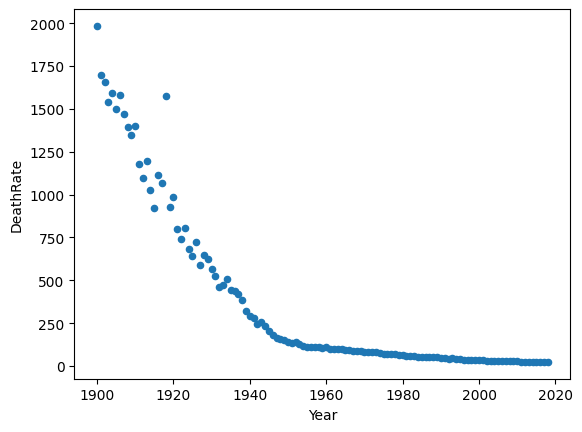

In [4]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<Axes: xlabel='Year'>

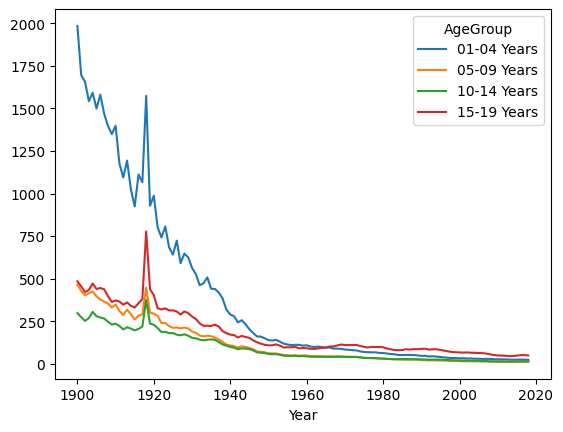

In [5]:
mortality_wide.plot()

## Plot the data

<Axes: >

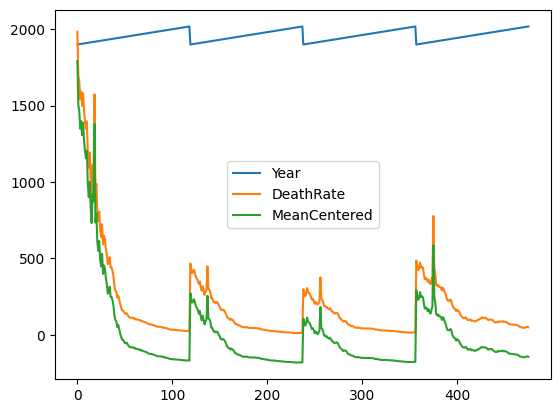

In [6]:
mortality_data.plot()

<Axes: xlabel='Year'>

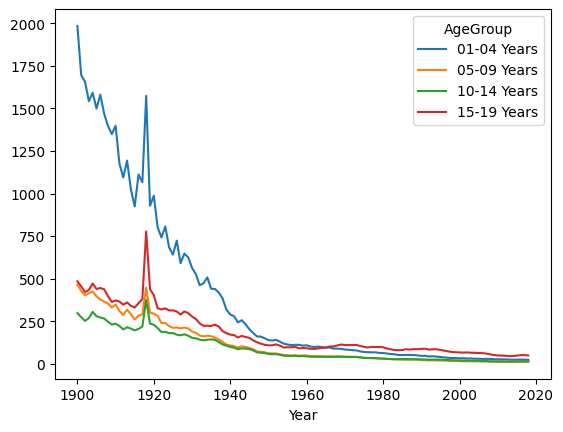

In [7]:
mortality_wide.plot()

## Parameters

<Axes: xlabel='Year', ylabel='DeathRate'>

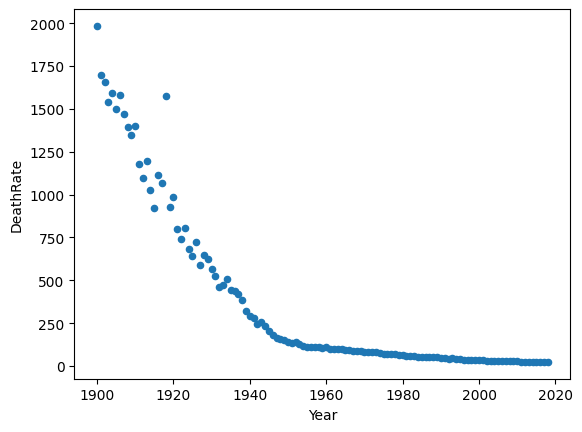

In [8]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<Axes: xlabel='Year'>

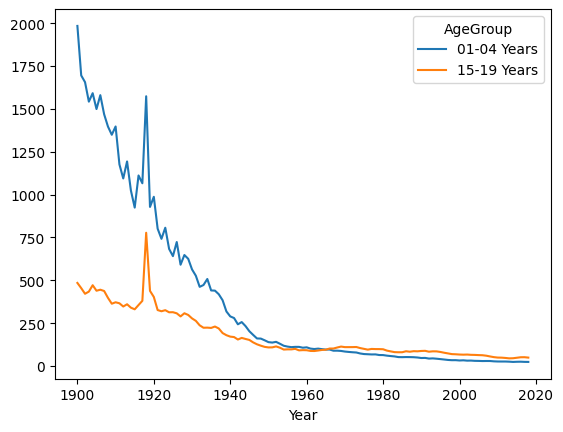

In [9]:
mortality_wide.plot.line(y=['01-04 Years','15-19 Years'])

## Line and area plots

<Axes: xlabel='Year'>

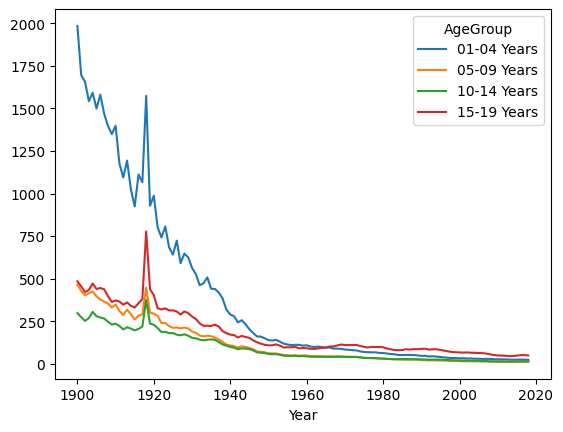

In [10]:
mortality_wide.plot.line()

<Axes: xlabel='Year'>

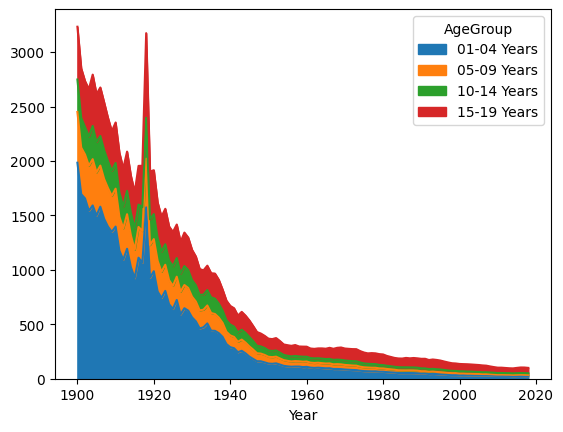

In [11]:
mortality_wide.plot.area()

## Scatter plots

<Axes: xlabel='Year', ylabel='DeathRate'>

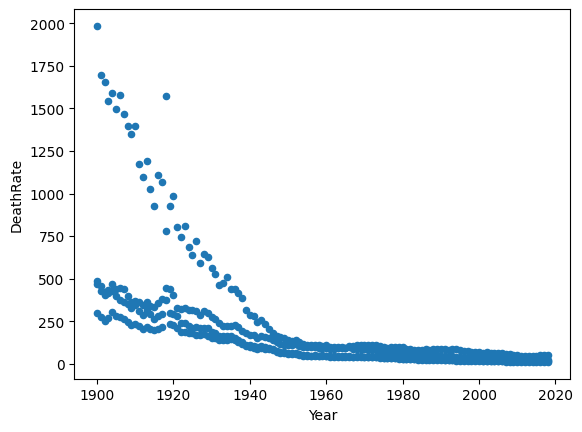

In [12]:
mortality_data.plot.scatter(x='Year', y='DeathRate')

In [13]:
# mortality_data.plot.scatter()   # Error: must have x and y parameters

In [14]:
# mortality_wide.plot.scatter(x='Year',y='Death_Rate') # Error: 'Year' is in an index

<Axes: xlabel='Year', ylabel='DeathRate'>

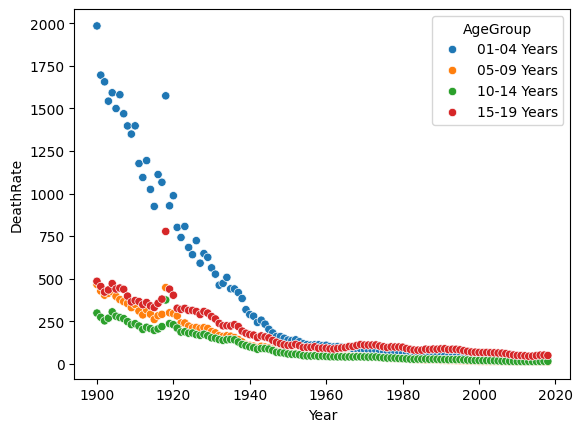

In [15]:
import seaborn as sns
sns.scatterplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup')

## Bar plots

<Axes: xlabel='Year'>

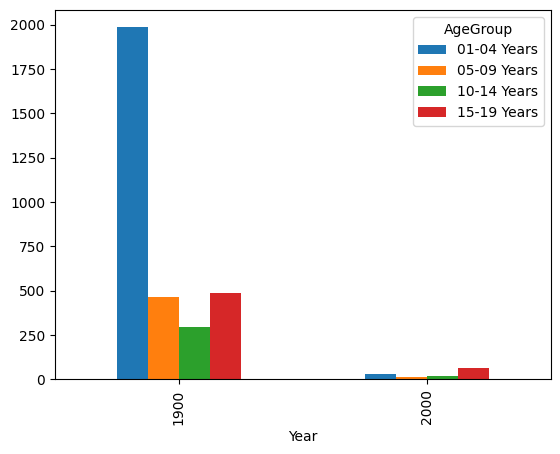

In [16]:
mortality_wide.query('Year in (1900,2000)').plot.bar()

<Axes: ylabel='Year'>

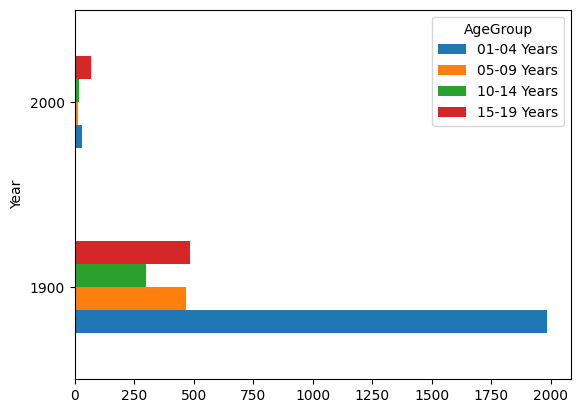

In [17]:
mortality_wide.query('Year in (1900,2000)').plot.barh()

## Histogram and density plots

<Axes: ylabel='Frequency'>

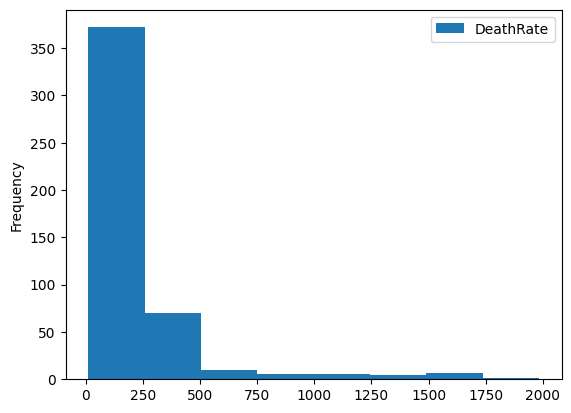

In [18]:
mortality_data.plot.hist(y='DeathRate',bins=8)

<Axes: ylabel='Density'>

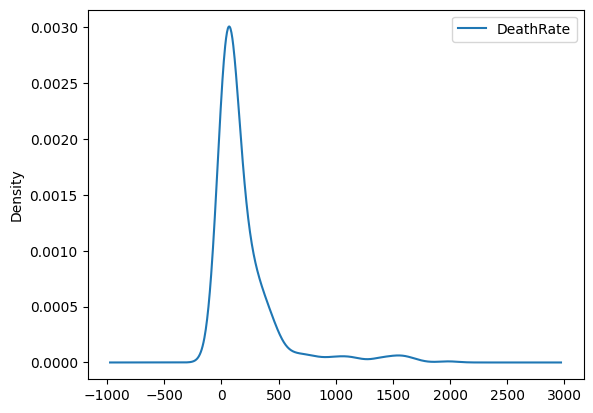

In [19]:
mortality_data.plot.density(y='DeathRate')

<Axes: ylabel='Density'>

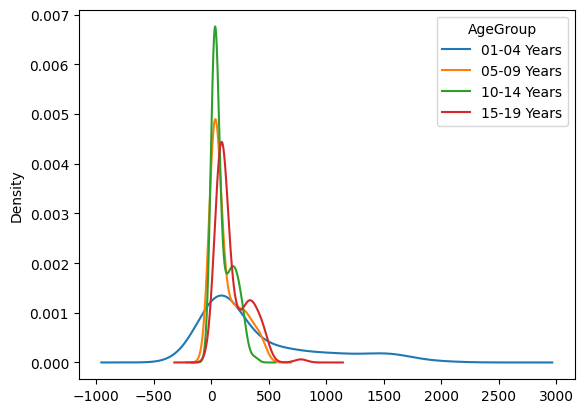

In [20]:
# not in book
mortality_wide.plot.density()

## Box and pie plots

<Axes: >

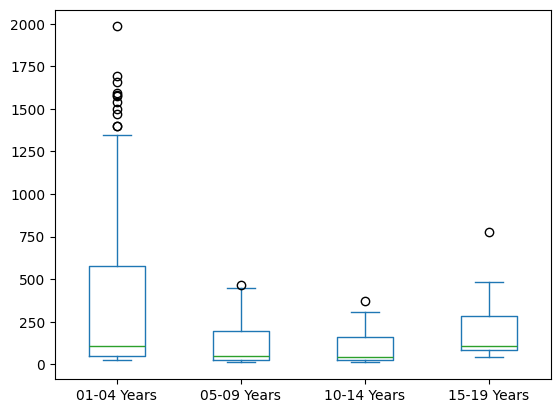

In [21]:
mortality_wide.plot.box()

<Axes: ylabel='DeathRate'>

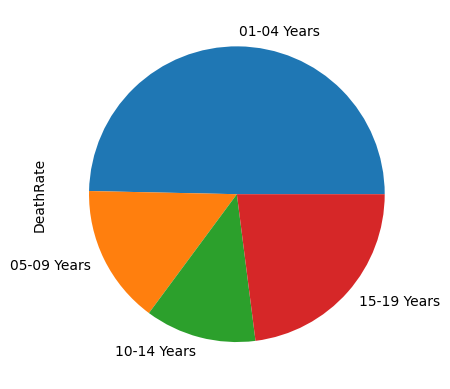

In [22]:
mortality_data.groupby('AgeGroup')['DeathRate'].sum().plot.pie()

## Improve the appearance

<Axes: title={'center': 'Child Mortality: 1900-2018'}, xlabel='Year', ylabel='Deaths per 100,000'>

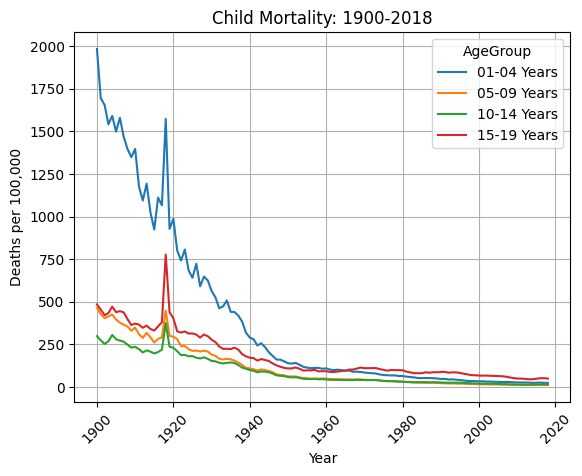

In [23]:
mortality_wide.plot.line(title='Child Mortality: 1900-2018',
                         ylabel='Deaths per 100,000', grid=True, rot=45)

<Axes: title={'center': 'Child Mortality: 2000-2018'}, xlabel='Year', ylabel='Deaths per 100,000'>

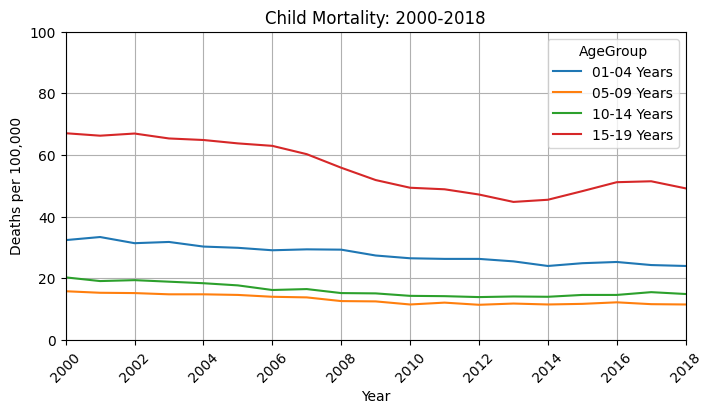

In [24]:
mortality_wide.plot.line(title='Child Mortality: 2000-2018',
     ylabel='Deaths per 100,000', figsize=(8,4), grid=True, rot=45,
     xlim=(2000,2018), ylim=(0,100))

## Subplots

array([[<Axes: title={'center': 'Child Mortality: 01-04'}, xlabel='Year', ylabel='Deaths per 100,000'>,
        <Axes: title={'center': 'Child Mortality: 05-09'}, xlabel='Year', ylabel='Deaths per 100,000'>],
       [<Axes: title={'center': 'Child Mortality: 10-14'}, xlabel='Year', ylabel='Deaths per 100,000'>,
        <Axes: title={'center': 'Child Mortality: 15-19'}, xlabel='Year', ylabel='Deaths per 100,000'>]],
      dtype=object)

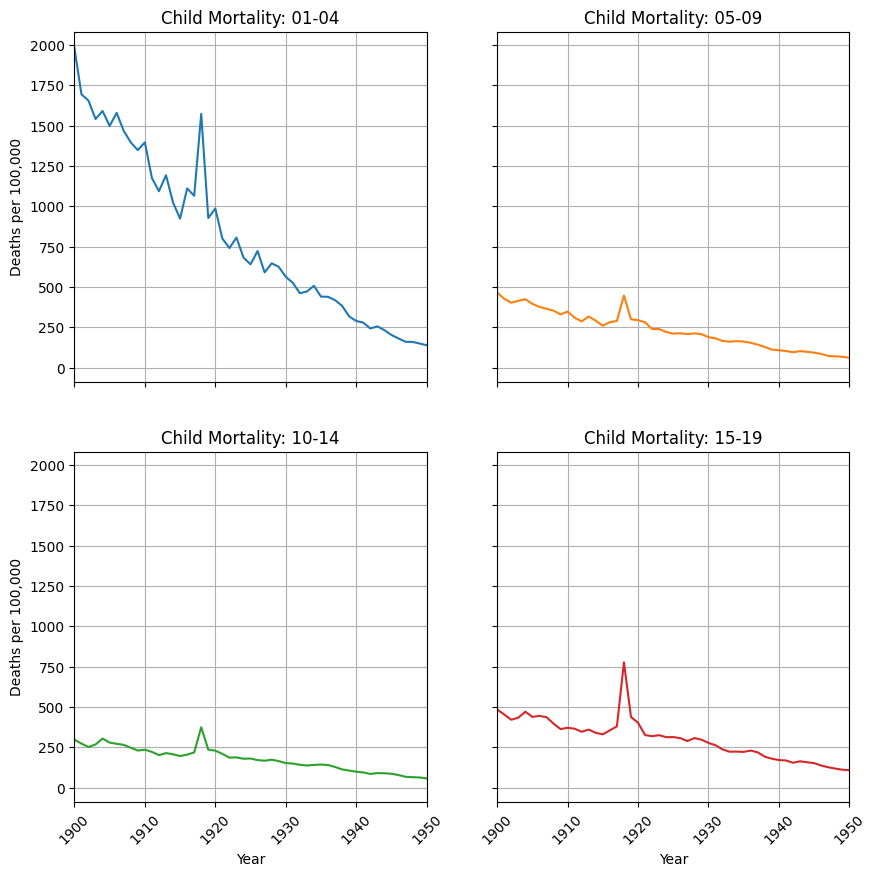

In [25]:
mortality_wide.plot.line(
    title=['Child Mortality: 01-04','Child Mortality: 05-09',
           'Child Mortality: 10-14','Child Mortality: 15-19'],
    ylabel='Deaths per 100,000', sharey=True,
    grid=True, rot=45, xlim=(1900,1950), legend=False,
    subplots=True, layout=(2,2), figsize=(10,10))

## Chaining

<Axes: ylabel='AgeGroup'>

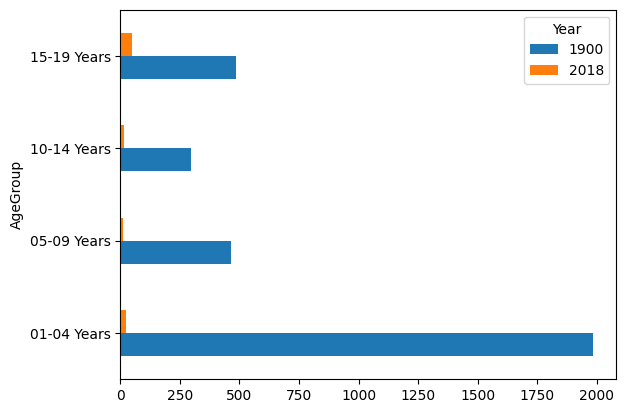

In [26]:
mortality_data.query('Year in (1900,2018)') \
     .pivot(index='AgeGroup', columns='Year', values='DeathRate') \
     .plot.barh()

<Axes: xlabel='Year', ylabel='Deaths per 100,000'>

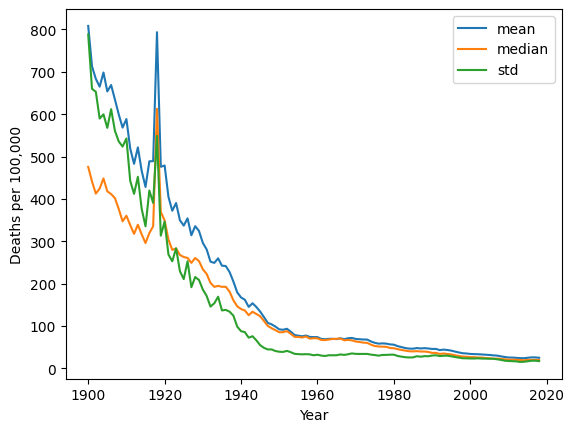

In [27]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std']).plot(ylabel='Deaths per 100,000')